In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
%matplotlib inline

In [2]:
# NOTE: we're using a single, fixed batch of the first 1000 images
mnist = input_data.read_data_sets( "MNIST_data/", one_hot=True )

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def plot_lambdas(x_points, 
                 training_points, 
                 test_points, 
                 baseline_points, 
                 title, 
                 label_x, 
                 label_y,
                 label_baseline,
                 label_training,
                 label_test):
    
    plt.figure(figsize=(10,7))
    plt.ylim((0.0,1.0))
    plt.xticks(x_points)
    plt.plot(x_points, baseline_points,'r', label=label_baseline)
    plt.plot(x_points, training_points,'b', label=label_training) 
    plt.plot(x_points, test_points,'g', label=label_test) 
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend(loc='upper right')
    
    plt.show()

In [4]:
def weight_variable(shape):
    initial = tf.truncated_normal( shape, stddev=0.1 )
    return tf.Variable( initial )

def bias_variable(shape):
    initial = tf.constant( 0.1, shape=shape )
    return tf.Variable(initial)

In [5]:
def L1_regularization(W_matrix, lambda_scalar):
    positive_matrix = tf.abs(W_matrix)
    sum_scalar = tf.reduce_sum(positive_matrix)
    penalty_scalar = tf.mul(lambda_scalar, sum_scalar)
    return penalty_scalar

In [6]:
y = tf.placeholder( tf.float32, shape=[None, 10], name="y" )
x = tf.placeholder( tf.float32, shape=[None, 784], name="x" )
lamb = tf.placeholder( tf.float32 , name="lambda")


W1 = weight_variable([784, 500])
b1 = bias_variable([500])
h1 = tf.nn.relu( tf.matmul( x, W1 ) + b1 )


W2 = weight_variable([500, 500])
b2 = bias_variable([500])
h2 = tf.nn.relu( tf.matmul( h1, W2 ) + b2 )


W3 = weight_variable([500, 1000])
b3 = bias_variable([1000])
h3 = tf.nn.relu( tf.matmul( h2, W3 ) + b3 )


W4 = weight_variable([1000, 10])
b4 = bias_variable([10])
predictions = tf.nn.softmax(tf.matmul(h3, W4) + b4)


cross_entropy_scalar = tf.reduce_mean(-tf.reduce_sum(y * tf.log(predictions), reduction_indices=[1]))
W1_penalty = L1_regularization(W1, lamb)
b1_penalty = L1_regularization(b1, lamb)
W2_penalty = L1_regularization(W2, lamb)
b2_penalty = L1_regularization(b2, lamb)
W3_penalty = L1_regularization(W3, lamb)
b3_penalty = L1_regularization(b3, lamb)
total_penalty_scalar = tf.add_n([W1_penalty, b1_penalty, W2_penalty, b2_penalty, W3_penalty, b3_penalty])
regularized_error = tf.add(cross_entropy_scalar, total_penalty_scalar)


correct_prediction = tf.equal(tf.argmax(predictions,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


train_step = tf.train.AdamOptimizer(1e-4).minimize(regularized_error)

Starting Round
Starting Round
Starting Round


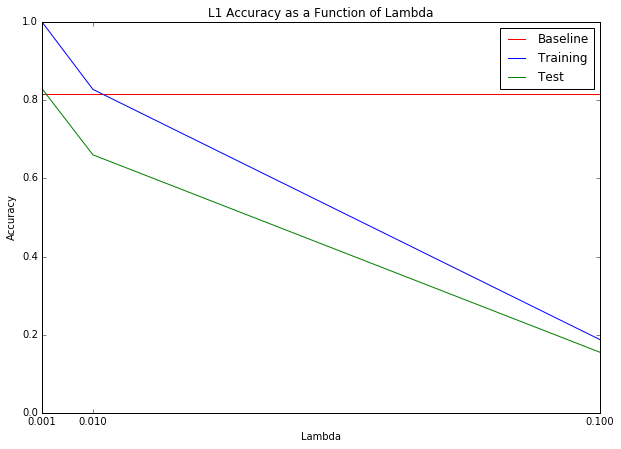

In [7]:
images = mnist.train.images[ 0:1000, : ]
labels = mnist.train.labels[ 0:1000, : ]
lambdas = [ 0.001, 0.01, 0.1]
length = len(lambdas)

training_points = np.zeros(length)
test_points = np.zeros(length)
baseline_points = [0.8153] * length


for i in range(length):
    with tf.Session() as sess:
        _lambda = lambdas[i]
        sess.run( tf.initialize_all_variables() )
        print("Starting Round")

        for j in range( 150 ):
            sess.run( train_step, feed_dict={ x: images, y: labels, lamb: _lambda} )

        train_acc = sess.run( accuracy, feed_dict={ x: images, y: labels, lamb: _lambda} )
        test_acc = sess.run( accuracy, feed_dict={ x: mnist.test.images, y: mnist.test.labels, lamb: _lambda} )

        training_points[i] = train_acc
        test_points[i] = test_acc

        
plot_lambdas(x_points = lambdas, 
             training_points = training_points, 
             test_points = test_points, 
             baseline_points = baseline_points, 
             title = "L1 Accuracy as a Function of Lambda", 
             label_x = "Lambda", 
             label_y = "Accuracy",
             label_baseline = "Baseline",
             label_training = "Training",
             label_test = "Test")
